In [1]:
import pandas as pd
import numpy as np

In [12]:
df_data = pd.read_csv("flight_ha.csv")
df_data.head()

,"_real,_time","_totl,_time","missn,_time","timer,_time","_zulu,_time","local,_time","hobbs,_time","__USE,puffs","__TOT,puffs","__VIS,_tris",...,"NAV_1,dme-d","NAV_1,h-def","NAV_1,v-def","___ap,__src","_fdir,_mode","_fdir,_ptch","_fdir,_roll","__HUD,power","__HUD,brite",
0,47.59469,0.01522,0.01522,0.0,2.27419,12.27419,0.87980,0.0,0.0,1042176.0,...,0.00000,-2.35010,-2.35010,0.0,0.0,1.65609,2.32481,1.0,0.5,
1,48.27396,0.06547,0.06547,0.0,2.27420,12.27420,0.87982,0.0,0.0,416052.0,...,0.00000,-1.90145,-1.90145,0.0,0.0,1.66552,2.34358,1.0,0.5,
2,48.70170,0.19324,0.19324,0.0,2.27424,12.27424,0.87985,0.0,0.0,416052.0,...,0.00000,-1.11890,-1.11890,0.0,0.0,1.70060,2.43736,1.0,0.5,
3,48.80650,0.29804,0.29804,0.0,2.27427,12.27427,0.87988,0.0,0.0,285903.0,...,1.40207,-0.87089,-0.87089,0.0,0.0,1.71509,2.49596,1.0,0.5,
4,48.91360,0.40514,0.40514,0.0,2.27430,12.27430,0.87991,0.0,0.0,285903.0,...,7.11613,-1.45111,-1.45111,0.0,0.0,1.72241,2.55011,1.0,0.5,


In [13]:
df_ils = pd.read_csv("ILS_ground_truth.csv")
df_ils.head()

,"_real,_time","_totl,_time","missn,_time","timer,_time","_zulu,_time","local,_time","hobbs,_time","__USE,puffs","__TOT,puffs","__VIS,_tris",...,"NAV_1,dme-d","NAV_1,h-def","NAV_1,v-def","___ap,__src","_fdir,_mode","_fdir,_ptch","_fdir,_roll","__HUD,power","__HUD,brite",
0,150.46246,3.09585,3.09585,0.0,2.27505,12.27505,0.98952,0.0,0.0,285903.0,...,9.70245,-2.49998,-2.49998,0.0,2.0,2.27038,3.80113,1.0,0.5,
1,150.55310,3.18649,3.18649,0.0,2.27507,12.27507,0.98955,0.0,0.0,285903.0,...,9.70035,-2.49999,-2.49999,0.0,2.0,2.27038,3.80113,1.0,0.5,
2,150.64398,3.27736,3.27736,0.0,2.27510,12.27510,0.98957,0.0,0.0,285903.0,...,9.69824,-2.49999,-2.49999,0.0,2.0,2.27038,3.80113,1.0,0.5,
3,150.75180,3.38519,3.38519,0.0,2.27513,12.27513,0.98960,0.0,0.0,285903.0,...,9.69574,-2.49999,-2.49999,0.0,2.0,2.27038,3.80113,1.0,0.5,
4,150.86143,3.49482,3.49482,0.0,2.27516,12.27516,0.98963,0.0,0.0,285903.0,...,9.69320,-2.50000,-2.50000,0.0,2.0,2.27038,3.80113,1.0,0.5,


In [23]:
df_latlon_ha = df_data[['   __lat,__deg ', '   __lon,__deg ']]
df_latlon_ils = df_ils[['   __lat,__deg ', '   __lon,__deg ']]

In [29]:
latlon_arr1 = df_latlon_ha.values

In [30]:
latlon_arr2 = df_latlon_ils.values

In [94]:
def calculate_distance(latlon1, latlon2):
    lat1 = latlon1[0]
    lon1 = latlon1[1]
    lat2 = latlon2[0]
    lon2 = latlon2[1]
    p = np.pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    distance = 12742 * np.arcsin(np.sqrt(a))
    return distance

In [114]:
from math import sin, cos, sqrt, atan2, radians
def distance_from_latlong(latlon1, latlon2):
    R = 6373.0
    
    lat1 = radians(latlon1[0])
    lon1 = radians(latlon1[1])
    lat2 = radians(latlon2[0])
    lon2 = radians(latlon2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [115]:
latlon_deviation_arr = []
for i in range(len(latlon_arr1)):
    distance = distance_from_latlong(latlon_arr1[i], latlon_arr2[i])
    latlon_deviation_arr.append(distance*3280.84)

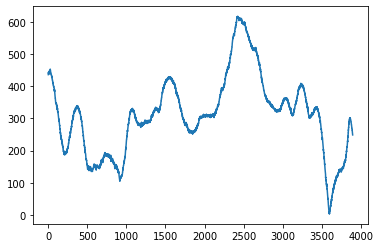

In [116]:
import matplotlib.pyplot as plt
plt.plot(latlon_deviation_arr)
plt.show()

In [97]:
altitude_ha = df_data["   __alt,ftmsl "].values
altitude_ils = df_ils["   __alt,ftmsl "].values

In [98]:
altitude_deviation_arr=[]
for i in range(len(altitude_ha)):
    distance = np.abs(altitude_ha[i]-altitude_ils[i])
    altitude_deviation_arr.append(distance)

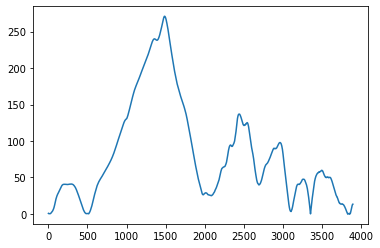

In [118]:
plt.plot(altitude_deviation_arr)

In [119]:
total_deviation_arr=[]
for i in range(len(altitude_ha)):
    distance = np.sqrt(latlon_deviation_arr[i]**2 + altitude_deviation_arr[i]**2)
    total_deviation_arr.append(distance)

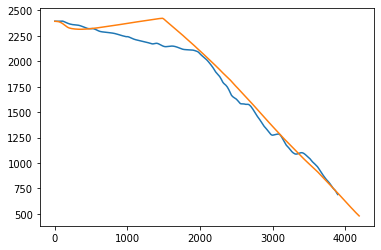

In [120]:
plt.plot(altitude_ha)
plt.plot(altitude_ils)

In [127]:
time = df_data["   missn,_time "].values
x = time-time[0]

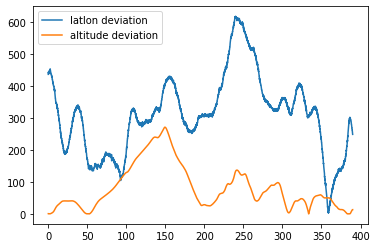

In [131]:
plt.plot(x, latlon_deviation_arr, label="latlon deviation")
plt.plot(x, altitude_deviation_arr, label="altitude deviation")
plt.legend()